In [1]:
import xarray as xr
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
#1
ds = xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

In [3]:
#1.1
#指定位置的sst
group_data=ds.sst.sel(lon=slice(120,170),lat=slice(-5,5)).groupby('time.month')
#去季节化，在三个月计算Niño 3.4，这几行求助于赵望超
anom=group_data - group_data.mean(dim='time')
resample_obj = anom.resample(time="3M")
ds_anom_resample = resample_obj.mean(dim="time")
#得到El Niño or La Niña events，np.logical_or为网上查到
masked_ds_anom_resample = ds_anom_resample.where(np.logical_or(ds_anom_resample < -0.5, ds_anom_resample > 0.5))
masked_ds_anom_resample

<xarray.DataArray 'sst' (time: 229, lat: 5, lon: 26)>
array([[[        nan,         nan,         nan, ..., -0.5904255 ,
         -0.51613617, -0.5157356 ],
        [        nan,         nan,         nan, ..., -0.60107803,
         -0.5806999 , -0.5200424 ],
        [        nan,         nan,         nan, ..., -0.61279106,
         -0.5868416 , -0.55138206],
        [        nan,         nan,         nan, ..., -0.5768242 ,
         -0.56368065, -0.5451031 ],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ..., -0.6501789 ,
         -0.5796814 , -0.58689374],
        [        nan,         nan,         nan, ..., -0.6904233 ,
         -0.68461037, -0.64244586],
        [        nan,         nan,         nan, ..., -0.7069289 ,
         -0.6881733 , -0.6722056 ],
        [        nan,         nan,         nan, ..., -0.64433545,
         -0.62889546, -0.6225446 ],
        [        nan,         nan,         nan, ..., -0.517519  ,
...
          0.51037025,         nan],
        [        nan,         nan,  0.7164224 , ...,         nan,
                 nan,         nan],
        [        nan,  0.5145791 ,  0.7320716 , ...,         nan,
                 nan,         nan],
        [        nan,         nan,  0.5983505 , ...,  0.5368557 ,
                 nan,         nan],
        [        nan,         nan,         nan, ...,  0.714798  ,
          0.5879669 ,         nan]],

       [[        nan,         nan,         nan, ...,  0.51263714,
                 nan,         nan],
        [        nan,  0.5078449 ,  0.57851505, ...,         nan,
                 nan,         nan],
        [ 0.5032301 ,  0.5828867 ,  0.66394806, ...,         nan,
                 nan,         nan],
        [        nan,         nan,  0.58321095, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,  0.5236778 ,
                 nan,         nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -4.0 -2.0 0.0 2.0 4.0
  * lon      (lon) float32 120.0 122.0 124.0 126.0 ... 164.0 166.0 168.0 170.0
  * time     (time) datetime64[ns] 1960-01-31 1960-04-30 ... 2017-01-31

Text(0.5, 1.0, 'SST Anomaly in Nino 3.4 Region')

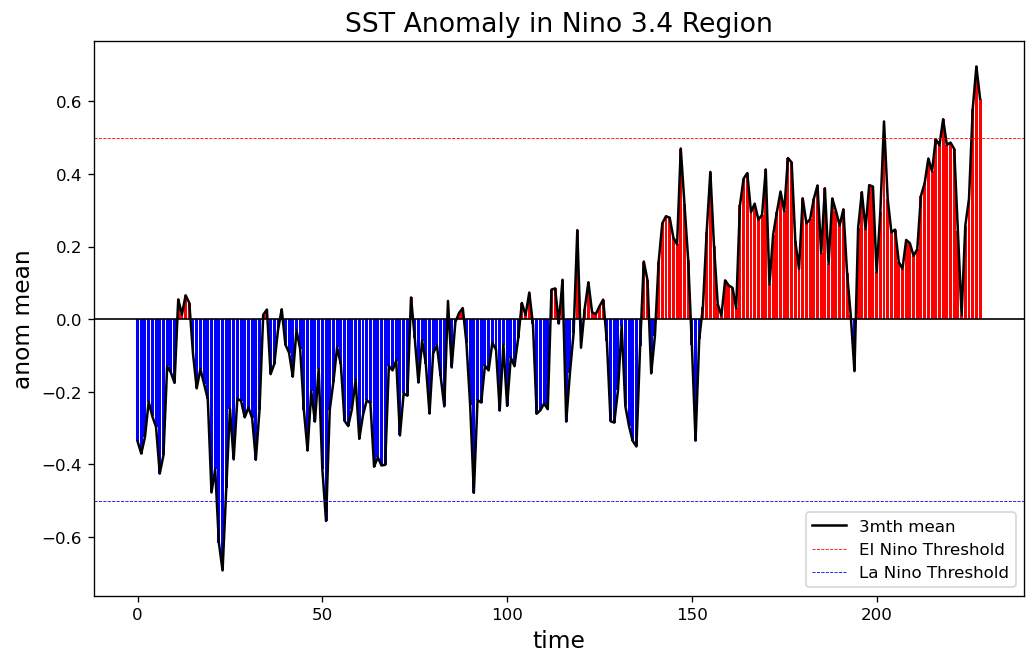

In [4]:
#1.2
ds_anom_resample_m = ds_anom_resample.mean(dim=['lat','lon'])
df=pd.DataFrame(ds_anom_resample_m.where(ds_anom_resample_m>=0),columns=['anom>=0'])
df['anom<0']=pd.DataFrame(ds_anom_resample_m.where(ds_anom_resample_m<0))
df['date'] = pd.DataFrame(ds_anom_resample_m.time)
df.set_index('date',inplace=True)
#根据正负进行上色
plt.figure(figsize=(10,6),dpi=120)
plt.bar(np.arange(len(df['anom>=0'])),df['anom>=0'],color="red")
plt.bar(np.arange(len(df['anom<0'])),df['anom<0'],color="blue")
plt.plot(ds_anom_resample_m,'k-')
#作出0，0.5，-0.5三条线，设置图例
plt.axhline(y=0.5,color="red",linestyle='--',linewidth=0.5)
plt.axhline(y=-0.5,color="blue",linestyle='--',linewidth=0.5)
plt.axhline(y=0,color="black",linestyle='-',linewidth=1)
plt.legend(labels=['3mth mean','EI Nino Threshold','La Nino Threshold'],loc=4)
plt.ylabel('anom mean',fontsize=14)
plt.xlabel('time',fontsize=14)
plt.title('SST Anomaly in Nino 3.4 Region',fontsize=16)

In [5]:
#2
dates = xr.open_dataset("CERES_EBAF-TOA_200003-201701.nc", engine="netcdf4")
dates

<xarray.Dataset>
Dimensions:                      (lon: 360, time: 203, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    ...                           ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

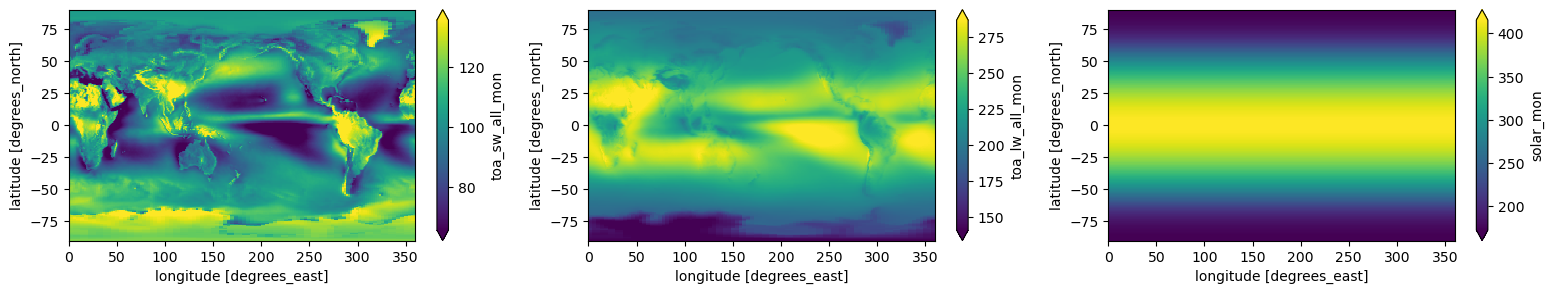

In [6]:
#2.1
fig,axes = plt.subplots(ncols=3, figsize=(19, 3))
dates.toa_sw_all_mon.mean(dim='time').plot(ax=axes[0], robust=True)
dates.toa_lw_all_mon.mean(dim='time').plot(ax=axes[1], robust=True)
dates.solar_mon.mean(dim='time').plot(ax=axes[2], robust=True)

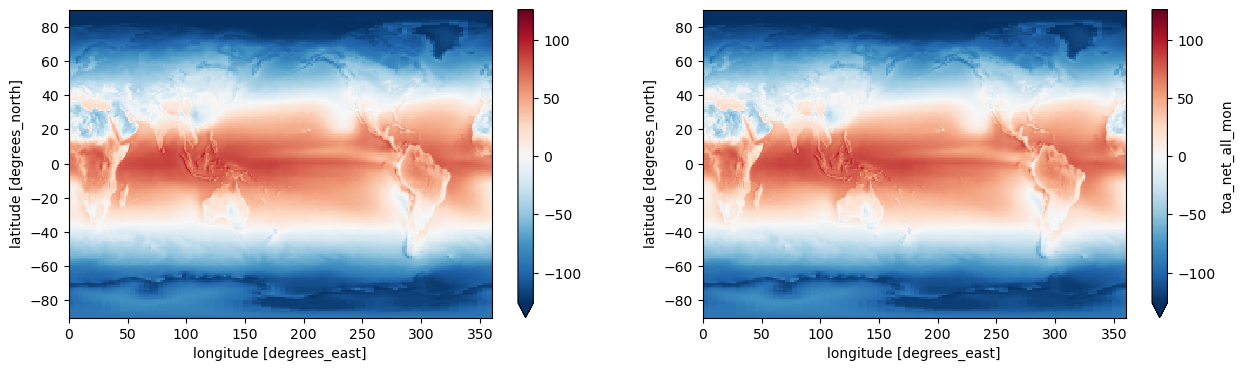

In [7]:
fig, axes = plt.subplots(ncols=2, figsize=(15,4))
#Incoming Solar Flux减去outgoing_longwave和outgoing_shortwave即为Net Flux
dates_total = dates.solar_mon.mean(dim='time')-dates.toa_sw_all_mon.mean(dim='time')-dates.toa_lw_all_mon.mean(dim='time')
dates_total.plot(ax=axes[0], robust=True)
dates.toa_net_all_mon.mean(dim='time').plot(ax=axes[1], robust=True)

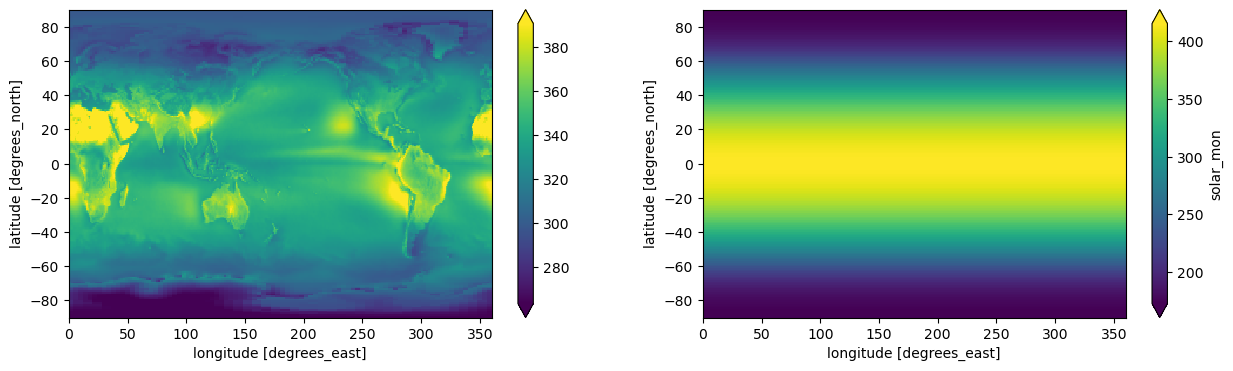

In [8]:
#2.2
#这一问题目没有读的很明白，感觉可能是以下两图比较相似
dates_o = dates.toa_sw_all_mon.mean(dim='time')+dates.toa_lw_all_mon.mean(dim='time')
dates_i = dates.solar_mon.mean(dim='time')
fig, axes = plt.subplots(ncols=2, figsize=(15,4))
dates_o.plot(ax=axes[0], robust=True)
dates_i.plot(ax=axes[1], robust=True)

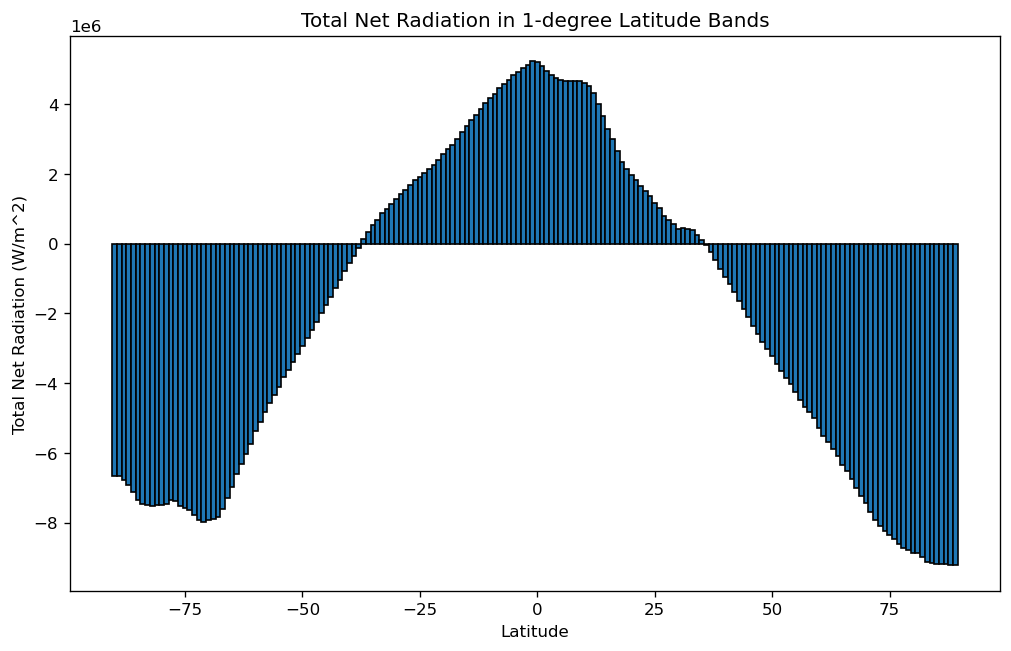

In [9]:
latitude = dates.variables['lat']
net_radiation = dates.variables['toa_net_all_mon']

# Calculate total net radiation in each 1-degree latitude band
#这里参考了龙师倩的代码
lat_bands = np.arange(-90, 91)
net_radiation_total = np.zeros(len(lat_bands) - 1)

for i in range(len(lat_bands) - 1):
    lat_1, lat_2 = lat_bands[i], lat_bands[i + 1]
    lat_mask = (latitude >= lat_1) & (latitude < lat_2)
    net_radiation_total[i] = np.sum(net_radiation[:, lat_mask])
plt.figure(figsize=(10, 6), dpi=120)
plt.bar( lat_bands[:-1],net_radiation_total, width=1, edgecolor='black')
plt.title('Total Net Radiation in 1-degree Latitude Bands')
plt.xlabel('Latitude')
plt.ylabel('Total Net Radiation (W/m^2)')
plt.show()

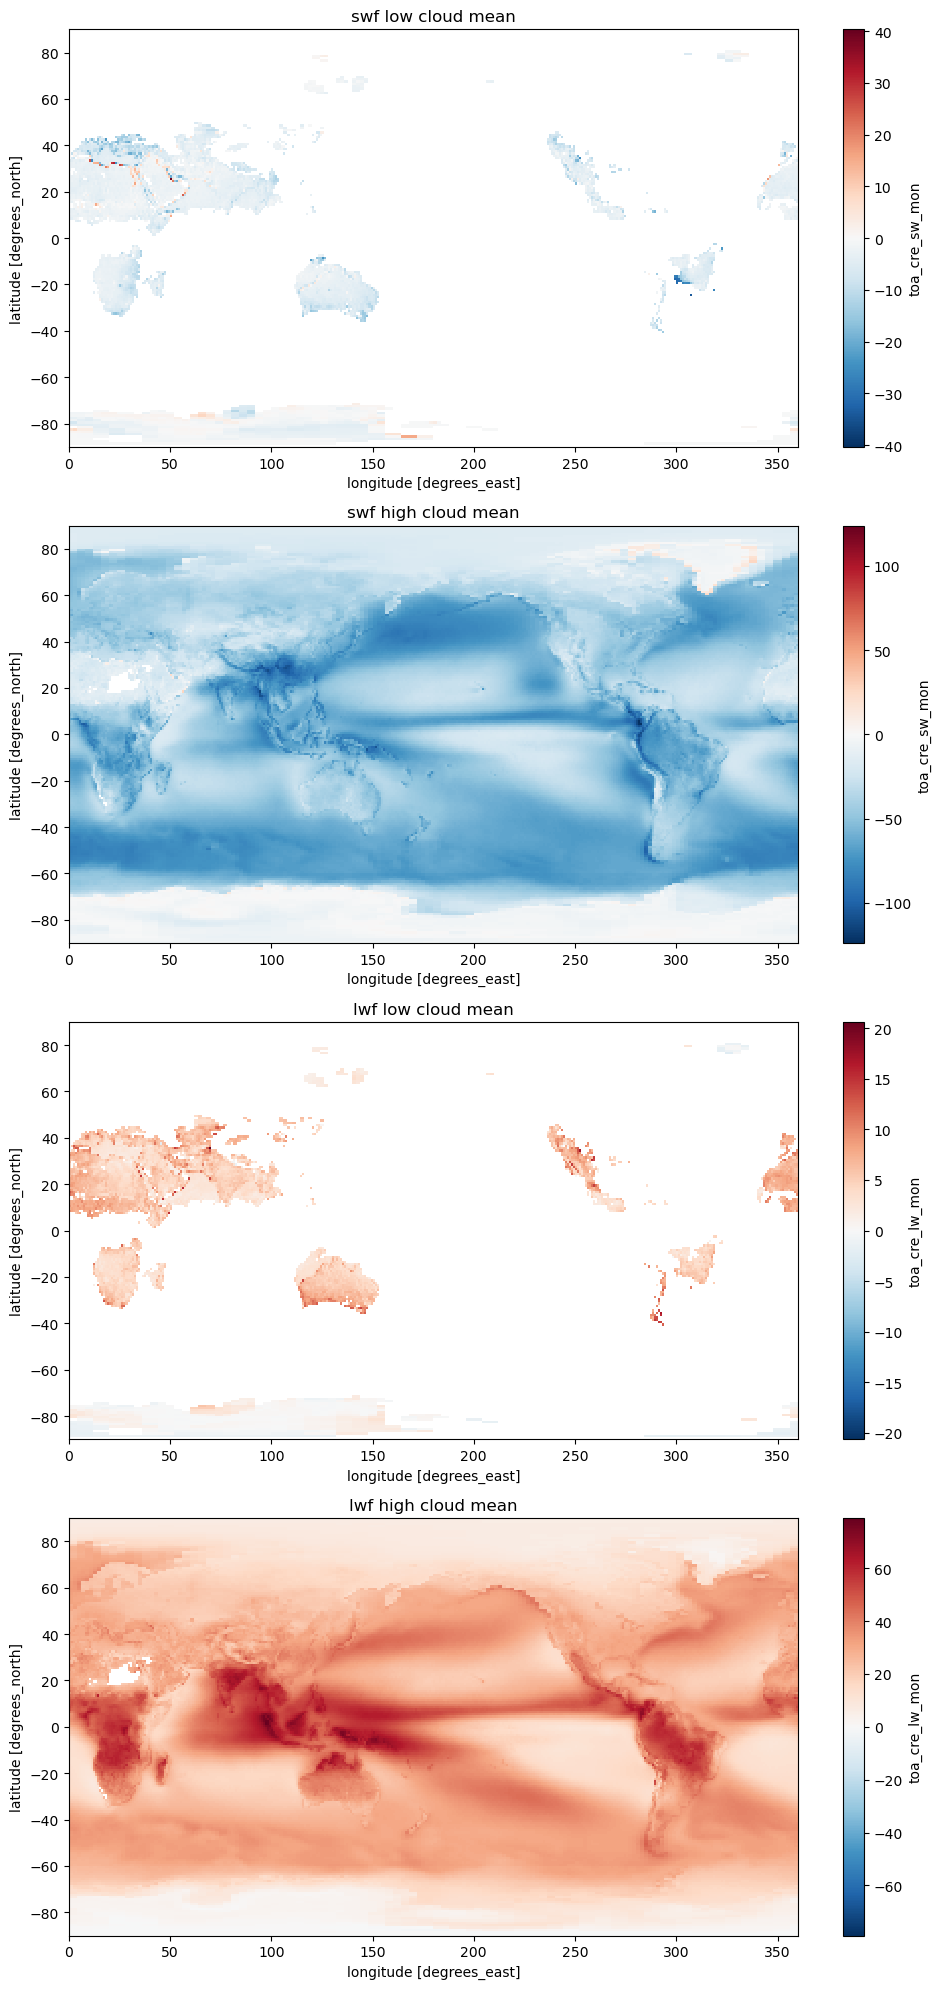

In [10]:
# 2.4
swf = dates['toa_cre_sw_mon']  # Shortwave radiation flux
lwf = dates['toa_cre_lw_mon']  # Longwave radiation flux
cld = dates['cldarea_total_daynight_mon']  # Total cloud area fraction
#计算分界值
min_value = dates['cldtau_total_day_mon'].min()
max_value = dates['cldtau_total_day_mon'].max()
range_size = max_value - min_value
low_cloud_threshold = min_value + (0.25 * range_size)
high_cloud_threshold = max_value - (0.25 * range_size)

#计算低云区和高云区的时间平均值
swf_low_cloud_mean = swf.where(cld<low_cloud_threshold).mean(dim='time')
swf_high_cloud_mean = swf.where(cld>high_cloud_threshold).mean(dim='time')
lwf_low_cloud_mean = lwf.where(cld<low_cloud_threshold).mean(dim='time')
lwf_high_cloud_mean = lwf.where(cld>high_cloud_threshold).mean(dim='time')

# Plot 
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(10,20))
swf_low_cloud_mean.plot(ax=ax1)
ax1.set_title('swf low cloud mean')
swf_high_cloud_mean.plot(ax=ax2)
ax2.set_title('swf high cloud mean')
lwf_low_cloud_mean.plot(ax=ax3)
ax3.set_title('lwf low cloud mean')
lwf_high_cloud_mean.plot(ax=ax4)
ax4.set_title('lwf high cloud mean')
plt.tight_layout()
plt.show()

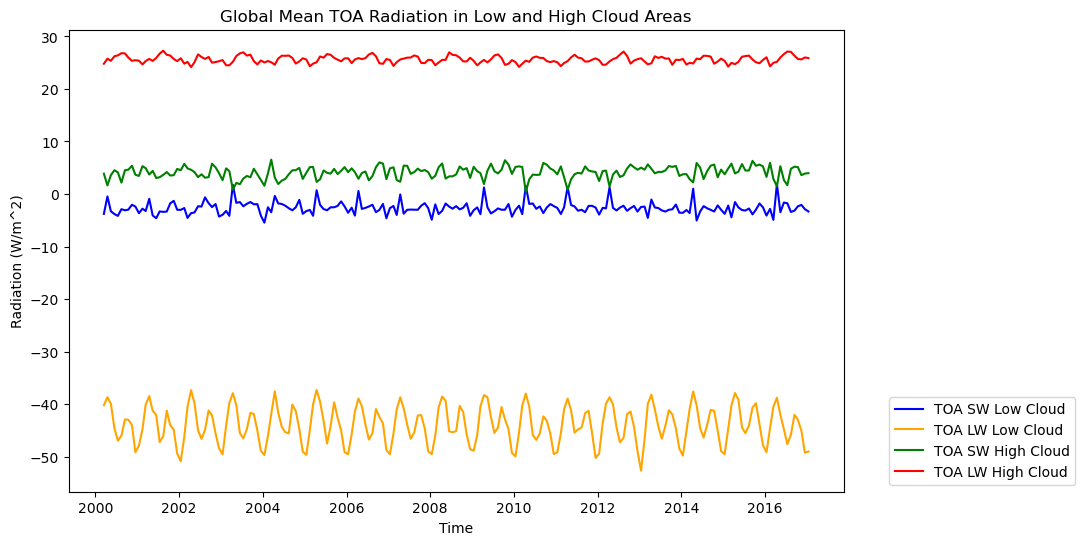

In [11]:
#2.5
#计算平均辐射
swf_low_cloud_mean_1 = swf.where(cld<low_cloud_threshold).mean(dim=['lon','lat'])
swf_high_cloud_mean_1 = swf.where(cld>high_cloud_threshold).mean(dim=['lon','lat'])
lwf_low_cloud_mean_1 = lwf.where(cld<low_cloud_threshold).mean(dim=['lon','lat'])
lwf_high_cloud_mean_1 = lwf.where(cld>high_cloud_threshold).mean(dim=['lon','lat'])

plt.figure(figsize=(10, 6))
plt.plot(swf_low_cloud_mean_1['time'], swf_low_cloud_mean_1, label='TOA SW Low Cloud', color='blue')
plt.plot(swf_high_cloud_mean_1['time'], swf_high_cloud_mean_1, label='TOA LW Low Cloud', color='orange')
plt.plot(lwf_low_cloud_mean_1['time'], lwf_low_cloud_mean_1, label='TOA SW High Cloud', color='green')
plt.plot(lwf_high_cloud_mean_1['time'], lwf_high_cloud_mean_1, label='TOA LW High Cloud', color='red')
plt.legend(loc='lower left',bbox_to_anchor=(1.05, 0))
plt.title('Global Mean TOA Radiation in Low and High Cloud Areas')
plt.xlabel('Time')
plt.ylabel('Radiation (W/m^2)')
plt.show()

In [12]:
#3
ds3 = xr.open_dataset("MERRA2_400.inst3_3d_chm_Nv.20200109.nc4", engine="netcdf4")
ds3

<xarray.Dataset>
Dimensions:  (lon: 576, lat: 361, lev: 72, time: 8)
Coordinates:
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lev      (lev) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 68.0 69.0 70.0 71.0 72.0
  * time     (time) datetime64[ns] 2020-01-09 ... 2020-01-09T21:00:00
Data variables:
    AIRDENS  (time, lev, lat, lon) float32 ...
    CO       (time, lev, lat, lon) float32 ...
    DELP     (time, lev, lat, lon) float32 ...
    O3       (time, lev, lat, lon) float32 ...
    PS       (time, lat, lon) float32 ...
Attributes: (12/30)
    History:                           Original file generated: Sun Jan 19 21...
    Comment:                           GMAO filename: d5124_m2_jan10.inst3_3d...
    Filename:                          MERRA2_400.inst3_3d_chm_Nv.20200109.nc4
    Conventions:                       CF-1
    Institution:                       NASA Global Modeling and Assimilation ...
    References:                        http://gmao.gsfc.nasa.gov
    ...                                ...
    Contact:                           http://gmao.gsfc.nasa.gov
    identifier_product_doi:            10.5067/HO9OVZWF3KW2
    RangeBeginningDate:                2020-01-09
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   2020-01-09
    RangeEndingTime:                   21:00:00.000000

Text(0.5, 1.0, 'a time series of O3 concentration with monthly seasonal cycle removed')

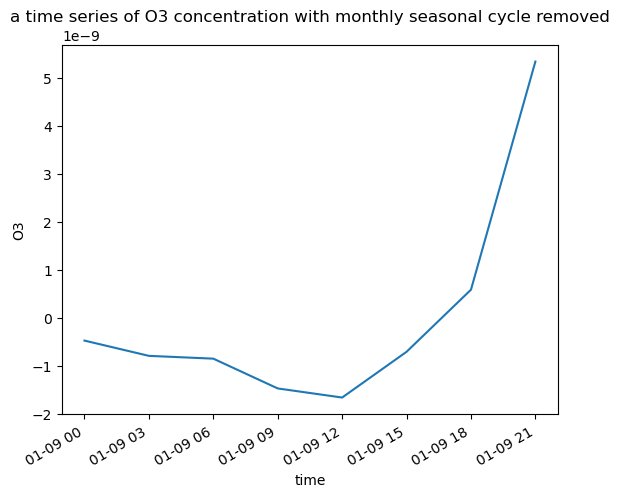

In [13]:
#3.1
o3 = ds3.O3.groupby('time.month')
o3_anom=o3 - o3.mean('time')
o3_anom.mean(dim=['lon','lat','lev']).plot()
plt.title('a time series of O3 concentration with monthly seasonal cycle removed')

Text(0.5, 1.0, 'Global O3 concentration')

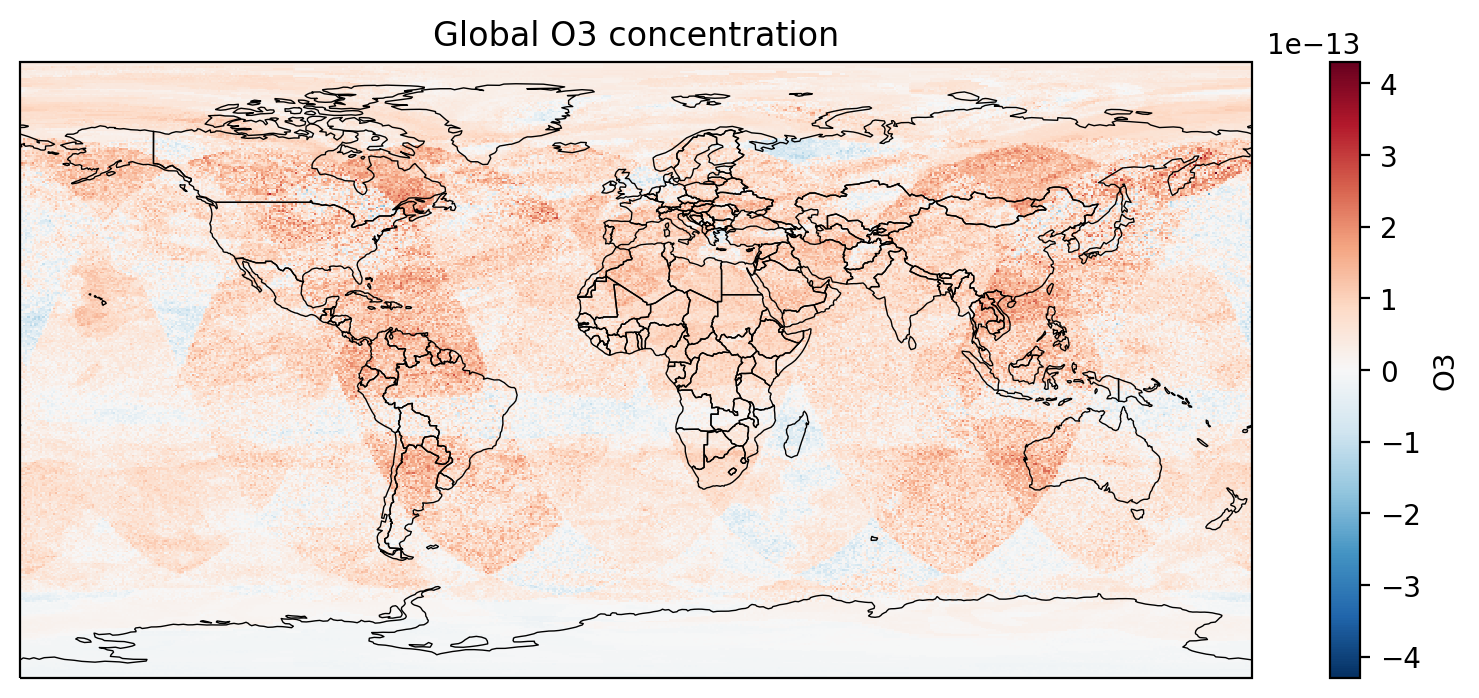

In [14]:
#3.2.1
plt.figure(figsize=(10,4), dpi=200)
proj = ccrs.PlateCarree() 
ax   = plt.axes(projection=proj)
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5))
o3_anom.mean(dim=['time','lev']).plot()
plt.title('Global O3 concentration')
#绘制全球O3浓度平均值

Text(0.5, 1.0, 'Plot of ozone concentration with height and time')

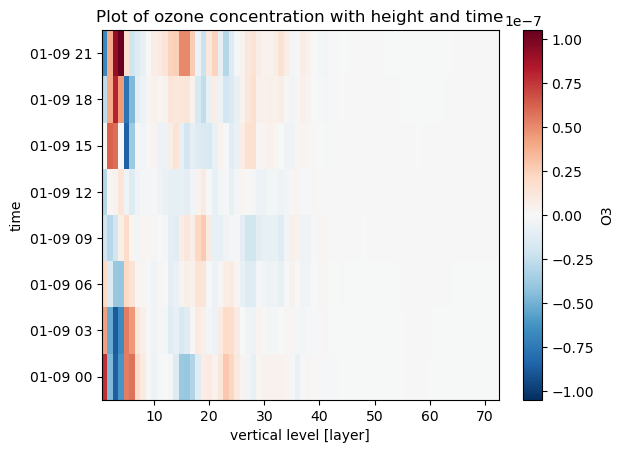

In [15]:
#3.2.2
o3_anom.mean(dim=['lon','lat']).plot()
plt.title('Plot of ozone concentration with height and time')
#臭氧浓度随高度和时间的关系图

Text(0.5, 1.0, 'Global CO concentration')

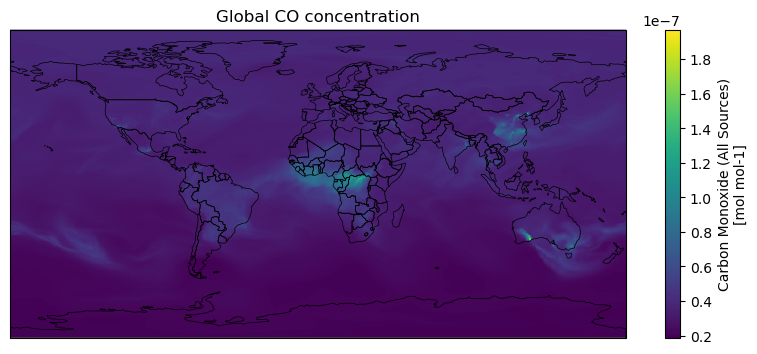

In [16]:
#3.2.3
#全球CO浓度
plt.figure(figsize=(10,4), dpi=100)
proj = ccrs.PlateCarree() 
ax   = plt.axes(projection=proj)
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5))
CO = ds3.CO.groupby('time.month')
CO.mean(dim=['time','lev']).plot()
plt.title('Global CO concentration')

Text(0.5, 1.0, 'Global mean surface pressure')

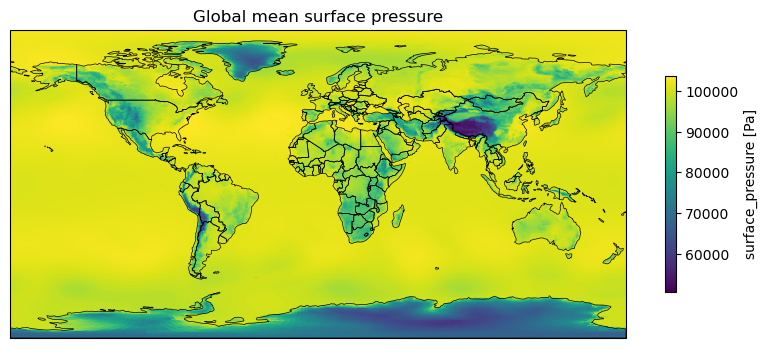

In [17]:
#3.2.4
#全球各处平均表面压力
plt.figure(figsize=(10,4), dpi=100)
proj = ccrs.PlateCarree() 
ax   = plt.axes(projection=proj)
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5))
PS = ds3.PS.groupby('time.month').mean(dim=['time'])
PS.plot(ax=ax, transform=ccrs.PlateCarree(),cbar_kwargs={'shrink': 0.7})
plt.title('Global mean surface pressure')

Text(0.5, 1.0, 'Surface pressure in the area around Shenzhen')

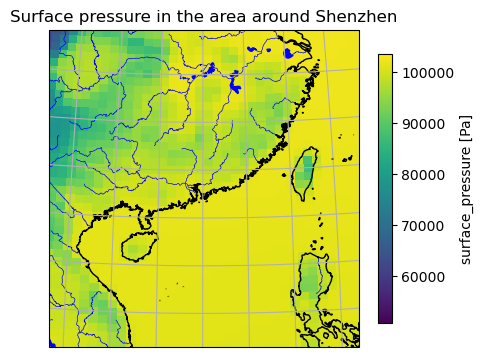

In [18]:
#3.2.5
rivers_10m = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m')
plt.figure(figsize=(5,5), dpi=100)
central_lon, central_lat = 114.06, 22.54 # Shenzhen
proj = ccrs.Orthographic(central_lon, central_lat) 
ax = plt.axes(projection=proj)
extent = [central_lon-10, central_lon+10, central_lat-10, central_lat+10]
ax.set_extent(extent)
ax.add_feature(cfeature.LAKES, edgecolor='blue', facecolor='blue', zorder=2)
ax.add_feature(rivers_10m, facecolor='None', edgecolor='blue', linewidth=0.5)
ax.coastlines(resolution='10m')
ax.gridlines()
PS = ds3.PS.groupby('time.month').mean(dim=['time'])
PS.plot(ax=ax, transform=ccrs.PlateCarree(),cbar_kwargs={'shrink': 0.7})
plt.title('Surface pressure in the area around Shenzhen')
#深圳附近地区的表面气压